<a href="https://colab.research.google.com/github/MSR806/iBHubs_AI/blob/main/Pandas/8.%20Pandas_Coding_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Data Analysis Process

Broadly, data analysis involves the following phases:
1. Question Phase - Asking questions
2. Wrangling Phase
  - Data Acquisition - Acquiring the data required to answer the question by various means
  - Data Cleaning - Cleaning the data so it can be used for further analysis
3. Data Exploration Phase - Getting familiar with the data, building intuition and finding patterns.
4. Drawing Conclusions Phase  - Arriving at conclusions based on the data or making some predictions. This phase usually involves statisitics or Machine Learning.
5. Communication Phase - Communicating your findings with the help of PPTs, blog posts etc. Data visualization can be very useful here.


**This process is not always done in this order.**

There can be a lot of going back and forth between the different phases. Especially the Wrangling Phase and Data Exploration Phase.
  - To clean problems in the data, you first need to explore the data to see what problems are there.
  - When you think you are done cleaning the data and you start exploring, you are likely to find more problems in the data, and you'll have to go back and clean the data.

Also, throughout the process, as you become more familiar with the dataset, you may need to go back and refine the question you're asking.

# Analysis On the Shopping Dataset


Sometimes data acquistion may come before you pose a question. If a new dataset is released, you may acquire the data first and then think of some questions that can be answered with the data. 

In this assignment, you'll be answering some interesting questions on the shopping dataset.

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/sales_data.csv

--2021-01-07 11:14:28--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/sales_data.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.64.26
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.64.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32406147 (31M) [text/csv]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>]  30.90M  17.7MB/s    in 1.7s    

2021-01-07 11:14:30 (17.7 MB/s) - ‘sales_data.csv’ saved [32406147/32406147]



In [3]:
shopping_df = pd.read_csv("sales_data.csv")
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502.0,iPhone,1.0,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503.0,AA Batteries (4-pack),1.0,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504.0,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505.0,Lightning Charging Cable,1.0,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506.0,AA Batteries (4-pack),2.0,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
372985,295660.0,AAA Batteries (4-pack),2.0,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
372986,295661.0,USB-C Charging Cable,1.0,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
372987,295662.0,Lightning Charging Cable,1.0,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
372988,295663.0,AAA Batteries (4-pack),1.0,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


# Getting Started with Matplotlib

* **plt.bar():** Make a bar plot.
* **plt.plot():** Can be used to make a line graph.

_____________________________________________________________________________
* **plt.xticks():** A list of positions at which ticks should be placed.
* **plt.xlabel(label_name):** Set the label for the x-axis.
* **plt.ylabel(label_name):** Set the label for the y-axis.

* **plt.show():** Display a figure.
* **plt.grid():** Configure the grid lines.

______________________________________________________________________________

* **plt.subplots():** Add a subplot to the current figure. It returns two arguments fig and ax where fig is figure and ax can be either a single Axes object or an array of Axes objects.
* **ax.twinx():** Creates a twin Axes sharing the xaxis.
* **ax.set_xlabel():** Set the label for the x-axis.
* **ax.set_ylabel():** Set the label for the y-axis.
* **ax.set_xticklabels():** Set the xaxis' labels with list of string labels.



### ***Refer to the [matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/index.html) for more details.***

## **Example 1**


5 students' marks are plotted on a bar graph.

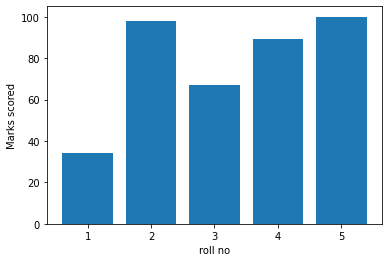

In [4]:
import matplotlib.pyplot as plt
marks_scored = [34, 98, 67, 89, 100]
roll_no = range(1, 6)
plt.bar(roll_no, marks_scored)
plt.xticks(roll_no)
plt.xlabel('roll no')
plt.ylabel('Marks scored')
plt.show()

## **Example 2**

Plot y versus x as lines and/or markers.

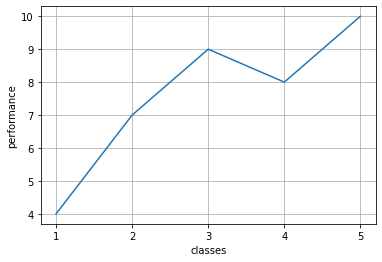

In [5]:
classes = [1,2,3,4,5]
performance = [4, 7, 9, 8, 10]

plt.plot(classes, performance)
plt.xticks(classes)
plt.xlabel('classes')
plt.ylabel('performance')
plt.grid()
plt.show()

## **Example 3**

Create a set of subplots in a single graph

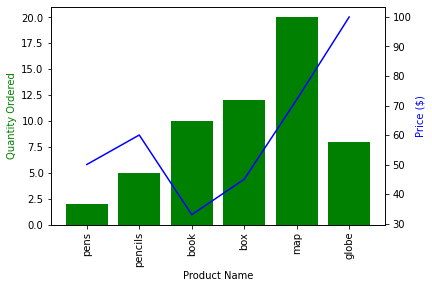

In [6]:
prices = [50, 60, 33, 45, 72, 100]
quantity = [2, 5, 10, 12, 20, 8]
products = ['pens', 'pencils', 'book', 'box', 'map', 'globe']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical')

plt.show()

#**Question 1:** 

**What is the best time to display advertisements to maximize the likelihood of customers' buying products?**

 ## Cleaning the data: 
* Ensure that there are no rows that contain all NaN values in the data
* Ensure that the columns are of the appropriate data types
* Add appropriate new columns if needed

In [7]:
shopping_df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [12]:
shopping_df = shopping_df.dropna(how='all')

shopping_df['Quantity Ordered'] = shopping_df['Quantity Ordered'].astype(dtype=int)
shopping_df['Order ID'] = shopping_df['Order ID'].astype(dtype=int)
shopping_df['Price Each'] = shopping_df['Price Each'].astype(dtype=float)
shopping_df['Order Date'] = pd.to_datetime(shopping_df['Order Date'])

shopping_df['Hour'] = shopping_df['Order Date'].dt.hour

##Analysis:
* Find the total number of orders made each hour.
* Find the hour with the highest number of orders.

In [17]:
orders_in_hour = shopping_df.groupby('Hour')['Quantity Ordered']
print("Max Orders was in ",orders_in_hour.sum().idxmax(), ' Hour, which is :-', orders_in_hour.sum().max())

Max Orders was in  19 th Hour, which is :- 28940


 ## Plotting:
* Plot a line graph between hours and the number of orders to get a visual understanding of what the best time to display advertisements is.

**Note:** To plot the graph, you can use the matplotlib library. Refer to the section **_Getting Started with Matplotlib_** for further details.

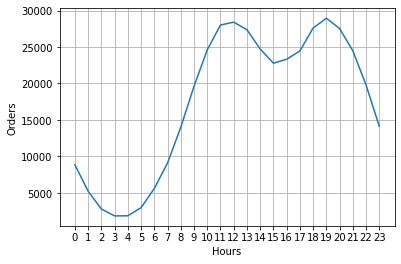

In [18]:
import matplotlib.pyplot as plt
hours = list(orders_in_hour.groups.keys())
orders = orders_in_hour.sum()

plt.plot(hours, orders)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.grid()
plt.show()

#**Question 2:** 

**What products are most often sold together?** 

##Analysis -1:
* Find the set of products(`Grouped orders`) ordered together.

**Hint**:
* If an iPhone, Macbook Pro Laptop and Lightning Charging Cable were ordered together, the `Grouped Orders` column should contain the string 'iPhone,Macbook Pro Laptop,Lightning Charging Cable' for the corresponding order_id in the dataframe.
* Use `pandas.core.groupby.DataFrameGroupBy.transform` to concatenate the product names.



In [ ]:
# WRITE YOUR CODE HERE

## Cleaning Data

* Remove any duplicate `Grouped Orders` that have the same `Order ID`.

In [ ]:
# WRITE YOUR CODE HERE

##Analysis -2:

* Find the most common `Grouped Orders`.

In [ ]:
# WRITE YOUR CODE HERE

#**Question 3:** 

**Which product has the highest sales(based on quantity)? Why do you think it has the highest sales?**

##Analysis:
* Find the total quantity ordered for each product.
* Find the product with the highest sales.


In [ ]:
# WRITE YOUR CODE HERE

## Plotting:
* Plot a bar graph(GRAPH-1) between the total quantity ordered and products to get a visual understanding of which product is sold the most.
* Plot a graph(GRAPH-2) with the products on the x-axis and the total quantity ordered and average price of each product on the y-axis to understand if a product's price is related to the quantity sold.
  


**Note:** To plot the graph, you can use the matplotlib library. Refer to the section **_Getting Started with Matplotlib_** for further details.

In [ ]:
# WRITE YOUR CODE HERE FOR GRAPH-1

In [ ]:
# WRITE YOUR CODE HERE FOR GRAPH-2

# **Question 4**


**Find the products with the highest popularity in each month of the year 2019.**






 ## Cleaning the data: 
* Add new columns if needed



In [ ]:
# WRITE YOUR CODE HERE

##Analysis:
* Find the total quantity ordered for each product in each month.
* Find the product with the maximum quantity ordered for each month.

**Hints:**
* Use `DataFrame.idxmax()` to get the indices of the rows with the maximum quantity ordered.
* You may need to use additional arguments of [ `pd.DataFrame.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby).

In [ ]:
# WRITE YOUR CODE HERE